# 2 Basic Classification and Regression

# Pre-class work

## 1. Moore's Law
Use the scripts from here to download a large amount of data relating to CPU specs. The scripts might take as long as an hour, depending on your connection speed. (Pay attention to the line "If you want to skip the steps in this section, you can simply download the aggregated result files from http://preshing.com/files/specdata20120207.zip and extract them to this folder." This will be faster and save you some troubles while providing the same dataset.)

In [72]:
import pandas as pd


# Read Data
df = pd.read_csv ('data/benchmarks.csv')

# Check if the data is loaded correctly
print (df)


                        testID       benchName    base   peak
0         cpu95-19990104-03254     101.tomcatv   19.40   27.1
1         cpu95-19990104-03254        102.swim   27.20   34.8
2         cpu95-19990104-03254      103.su2cor   10.10   9.98
3         cpu95-19990104-03254     104.hydro2d    8.58   8.61
4         cpu95-19990104-03254       107.mgrid    8.94   9.44
...                        ...             ...     ...    ...
136990  cpu2006-20120102-19319  462.libquantum  418.00  418.0
136991  cpu2006-20120102-19319     464.h264ref   46.10   50.1
136992  cpu2006-20120102-19319     471.omnetpp   19.10   20.2
136993  cpu2006-20120102-19319       473.astar   21.10   21.1
136994  cpu2006-20120102-19319   483.xalancbmk   28.80   28.8

[136995 rows x 4 columns]


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Extract the date and base speed for a benchmark of your choice.

In [73]:
import datetime
date = df.testID.str.split('-').str[1]
newdate = []

# Get data, store in a different column.
for d in date:
    d = str(d)
    if(d=='nan'):
        newdate.append('nan')
        continue
    if len(d)<8:
        d = '19'+d
    newdate.append(datetime.datetime.strptime(d, "%Y%m%d"))
    
df['date'] = newdate
df.dropna(axis=0, how='all', subset=['date'], inplace=True)

# Benchmark of my choice
df = df[df['benchName']=='147.vortex']
df.reset_index(drop=True)
df = df[['date', 'base']]

# Datetime to float, so we can plot the graph

def date_to_float(x):
    x = str(x)
    x = x.split(" ")[0].split("-")
    x = int(x[0])+int(x[1])/12+int(x[2])/360
    return x
df["date"] = df["date"].apply(date_to_float)

# To check if date is updated with the floats.
print(df)

             date   base
17    1999.094444  22.20
25    1999.133333  21.60
43    1999.144444  13.60
131   1999.169444  26.60
139   1999.169444  14.10
...           ...    ...
9309  1998.966667   9.66
9317  1998.980556  21.90
9335  1999.011111  26.40
9343  1999.019444  19.30
9371  1999.058333  27.20

[494 rows x 2 columns]


<ipython-input-73-5f737992b08c>:15: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df['date'] = newdate


Plot the data in a semi-log plot.

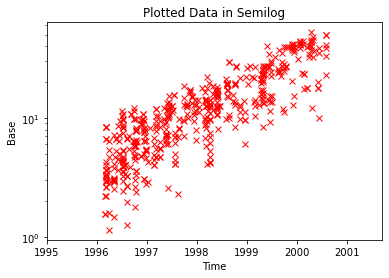

In [80]:
import matplotlib.pyplot as plt

import numpy as np

plt.semilogy(df['date'], df['base'], 'x', color='red')
# Set the limit of x axis
plt.xlim([1995,2001.7])
plt.title('Plotted Data in Semilog')

# X-axis title
plt.xlabel('Time')

# Y-axis title
plt.ylabel('Base')

plt.show()

Now train a linear model to fit your plot.

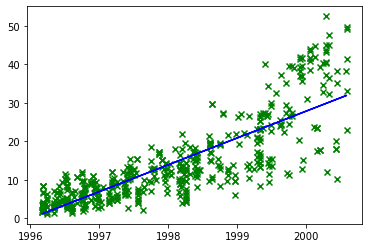

In [81]:
from sklearn.linear_model import LinearRegression
from numpy import array
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X.reshape(-1,1)
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, marker = 'x', color='green')
plt.plot(X, model.predict(X),color='blue')
plt.show()

How well is Moore's Law holding up?

The CPU's speed is getting faster over the time. 

Based on the regression model, it 4 years, speed went up from 0 to 30.

On average, base increases by 7.5 per year.

## 2. MNIST Digits
No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwriting digits (0-9).

Using scikit-learn, load the MNIST digits (see here).

In [76]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Plot some of the examples.

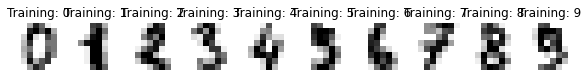

In [77]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.

In [78]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X = digits.data 
y = digits.target
trainData,testData,trainLabel,testLabel = train_test_split(X, y, test_size=0.25, random_state=123)

In [79]:
model = KNeighborsClassifier(n_neighbors=1)
# I tried multiple values of k, and seems k=1 performs the best.
model.fit(trainData,trainLabel)
predictions = model.predict(testData)
print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.91      1.00      0.95        42
           2       1.00      0.98      0.99        41
           3       0.93      1.00      0.96        40
           4       0.98      1.00      0.99        52
           5       1.00      0.96      0.98        48
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        41
           8       1.00      0.93      0.97        45
           9       0.95      0.90      0.93        42

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Report your error rates on a held out part of the data.

Error rate would be 1 - accuracy.

(optional) Test your model on the full dataset (available from here).
Keep a record of your figures and results, and make sure that they are easily accessible when you come to class (e.g. be able to state your error rate, or paste your code/figure into a group doc.)